In [8]:
import torch
import os
import cv2
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, utils

from torchsummary import summary

In [9]:
#batch_size = 128

num_epochs = 100
batch_size = 512
image_height = 100
image_width = 100
num_channels = 3

transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                       transforms.Resize((image_height, image_width)),
                                       ])

# train_set = datasets.ImageFolder(
#     root='../archive/fruits-360-original-size/fruits-360-original-size/Training',
#     transform=transform
# )

# validation_set = datasets.ImageFolder(
#     root='../archive/fruits-360-original-size/fruits-360-original-size/Validation',
#     transform=transform
# )

# test_set = datasets.ImageFolder(
#     root='../archive/fruits-360-original-size/fruits-360-original-size/Test',
#     transform=transform
# )

## Check

train_set = datasets.ImageFolder(
    root='../archive/fruits-360_dataset/fruits-360/Training',
    transform=transform
)

test_set = datasets.ImageFolder(
    root='../archive/fruits-360_dataset/fruits-360/Test',
    transform=transform
)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

#validationloader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size, shuffle=False)

In [10]:
train_set

Dataset ImageFolder
    Number of datapoints: 67692
    Root location: ../archive/fruits-360_dataset/fruits-360/Training
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [11]:
test_set

Dataset ImageFolder
    Number of datapoints: 22688
    Root location: ../archive/fruits-360_dataset/fruits-360/Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [12]:
#validation_set

In [13]:
classes = train_set.classes
print(classes)
print('Class size:', len(classes))

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [14]:
images, labels = next(iter(trainloader)) 
print("images-size:", images.shape)

out = utils.make_grid(images)
print("out-size:", out.shape)

C:\Users\hejac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


images-size: torch.Size([512, 3, 100, 100])
out-size: torch.Size([3, 6530, 818])


Shape: (100, 100, 3)


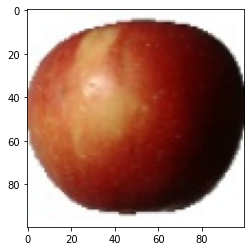

In [16]:
example_train_path = '../archive/fruits-360_dataset/fruits-360/Training/'
path = '../archive/fruits-360_dataset/fruits-360'
img = cv2.imread(example_train_path + "Apple Braeburn/0_100.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Shape:", img.shape)
plt.imshow(img)

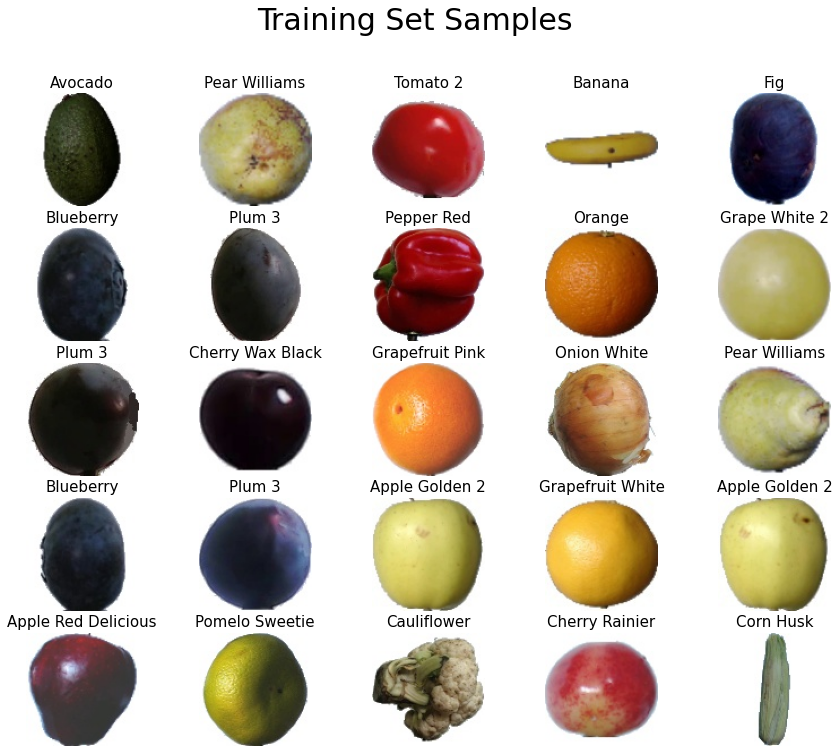

In [17]:
import random

# Function for plotting samples
def plot_samples(samples):  
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15,12))
    i = 0
    for row in range(5):
         for col in range(5):
                img = cv2.imread(samples[i][0][0])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax[row][col].imshow(img)
                ax[row][col].axis('off')
                ax[row][col].set_title(samples[i][1], fontsize=15)
                i+=1
  

rand_samples = [] 
for _ in range(25): 
    classes = random.choice(train_set.classes)
    rand_samples.append([random.sample([os.path.join(path+'/Training/'+classes, filename) for filename in os.listdir(path+'/Training/'+classes)], 1), classes]) 
rand_samples[0]
plot_samples(rand_samples)
plt.suptitle('Training Set Samples', fontsize=30)
plt.show()

In [18]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(128, 3, 100, 3)
#         self.pool = nn.MaxPool2d()
#         #self.dropout1 = nn.Dropout2d(0.25)
#         #self.dropout2 = nn.Dropout2d(0.5)
#         self.conv2 = nn.Conv2d(64, 3)
#         self.conv3 = nn.Conv2d(32, 3)
#         self.pool = nn.MaxPool2d()
#         self.dropout1 = nn.Dropout2d(0.5)
#         self.fc1 = nn.Linear(15488, 128)
#         self.fc2 = nn.Linear(128, 131)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.dropout1(x)
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

In [19]:
# net = CNN()
# print(net)

In [20]:
# device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
# print('Device:', device)

In [21]:
CUDA = torch.cuda.is_available()
if CUDA:
    print(f"Using GPU")

Using GPU


In [22]:
class LRScheduler():
    def __init__(self, optimizer, patience=5, min_lr=1e-7, factor=0.5):
        self.optimizer = optimizer
        self.patience = patience
        self.min_lr = min_lr
        self.factor = factor
        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer,mode='min',patience=self.patience,factor=self.factor,min_lr=self.min_lr,verbose=True)
    def __call__(self, val_loss):
        self.lr_scheduler.step(val_loss)

class EarlyStopping():
    def __init__(self, patience=5, min_delta=0,save_best=False):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.save_best=save_best
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
            if self.save_best:
                self.save_best_model()
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            if self.save_best:
                self.save_best_model()
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
    def save_best_model(self):
        print(">>> Saving the current model with the best loss value...")
        print("-"*100)
        torch.save(model.state_dict(), 'best_model_loss.pkl')

In [23]:
num_classes = len(train_set.classes)

In [24]:
class Fruits_CNN(nn.Module):
    def __init__(self):
        super(Fruits_CNN, self).__init__()
        self.relu = nn.ReLU()

        self.conv1 = nn.Conv2d(in_channels=num_channels, out_channels=16, kernel_size=5, stride=1, padding='same')
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 16*50*50

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=4, stride=1, padding='same')
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 32*25*25

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding='same')
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.maxpool3 = nn.MaxPool2d(kernel_size=5, stride=5)
        # 64*5*5 = 1600 >> it is in_features value for the self.linear1

        self.flatten1 = nn.Flatten()

        self.linear1 = nn.Linear(in_features=1600, out_features=512)
        self.dropout1 = nn.Dropout(p=0.25)
        self.linear2 = nn.Linear(512, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool1(out)

        out = self.conv2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool2(out)

        out = self.conv3(out)
        out = self.batchnorm3(out)
        out = self.relu(out)
        out = self.maxpool3(out)

        out = self.flatten1(out)
        out = self.linear1(out)
        out = self.relu(out)
        out = self.dropout1(out)

        out = self.linear2(out)

        return out

In [25]:
model = Fruits_CNN()

if CUDA:
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = LRScheduler(optimizer= optimizer,patience=5,min_lr=1e-7, factor=0.5)
early_stopping = EarlyStopping(patience=15, min_delta=0, save_best=True)

print(summary(model, (num_channels, image_height,image_width),batch_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [512, 16, 100, 100]           1,216
       BatchNorm2d-2        [512, 16, 100, 100]              32
              ReLU-3        [512, 16, 100, 100]               0
         MaxPool2d-4          [512, 16, 50, 50]               0
            Conv2d-5          [512, 32, 50, 50]           8,224
       BatchNorm2d-6          [512, 32, 50, 50]              64
              ReLU-7          [512, 32, 50, 50]               0
         MaxPool2d-8          [512, 32, 25, 25]               0
            Conv2d-9          [512, 64, 25, 25]          18,496
      BatchNorm2d-10          [512, 64, 25, 25]             128
             ReLU-11          [512, 64, 25, 25]               0
        MaxPool2d-12            [512, 64, 5, 5]               0
          Flatten-13                [512, 1600]               0
           Linear-14                 [5

C:\Users\hejac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:1004.)
  return F.conv2d(input, weight, bias, self.stride,


In [26]:
from datetime import datetime
import math

In [27]:
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

print('Start Training')
print('*'*100)

for epoch in range(num_epochs):
    start_time = datetime.now()

    # TRAINING
    correct = 0
    iterations = 0
    iter_loss = 0.0

    model.train()

    for i, data in enumerate(trainloader):
        inputs, labels = data
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        iter_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        iterations += 1

    train_loss.append(iter_loss / iterations)
    train_accuracy.append(100 * correct / len(train_set))

    # TESTING
    loss_testing = 0.0
    correct = 0
    iterations = 0

    model.eval()

    for i, data in enumerate(testloader):
        inputs, labels = data
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss_testing += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()

        iterations += 1

    test_loss.append(loss_testing / iterations)
    test_accuracy.append(100 * correct / len(test_set))

    print('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Acc: {:.3f}'
          .format(epoch + 1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))

    end_time = datetime.now()
    epoch_time = (end_time - start_time).total_seconds()
    print("-"*100)
    print('Epoch Time : ', math.floor(epoch_time // 60), ':', math.floor(epoch_time % 60))
    print("-"*100)

    lr_scheduler(test_loss[-1])
    early_stopping(test_loss[-1])
    if early_stopping.early_stop:
        print('*** Early stopping ***')
        break
    
print('*'*100)
print('Training Completed')

Start Training
****************************************************************************************************


C:\Users\hejac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1/100, Training Loss: 0.994, Training Accuracy: 75.554, Testing Loss: 0.195, Testing Acc: 94.715
----------------------------------------------------------------------------------------------------
Epoch Time :  12 : 24
----------------------------------------------------------------------------------------------------
>>> Saving the current model with the best loss value...
----------------------------------------------------------------------------------------------------
Epoch 2/100, Training Loss: 0.052, Training Accuracy: 98.904, Testing Loss: 0.099, Testing Acc: 97.712
----------------------------------------------------------------------------------------------------
Epoch Time :  3 : 47
----------------------------------------------------------------------------------------------------
>>> Saving the current model with the best loss value...
----------------------------------------------------------------------------------------------------
Epoch 3/100, Training Loss: 0.0

In [28]:
model = Fruits_CNN()
model.load_state_dict(torch.load('best_model_loss.pkl'))
model.eval()

Fruits_CNN(
  (relu): ReLU()
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (batchnorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1), padding=same)
  (batchnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1600, out_features=512, bias=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (linear2): Linear(in_features=5

In [45]:
def list_of_tensors_to_list(tensor_list):
    accuracy = []
    for tensor_item in tensor_list:
        accuracy.append(torch.cuda.FloatTensor(tensor_item))
    return accuracy

train_accuracy = list_of_tensors_to_list(train_accuracy)
test_accuracy = list_of_tensors_to_list(test_accuracy)

TypeError: new(): data must be a sequence (got float)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

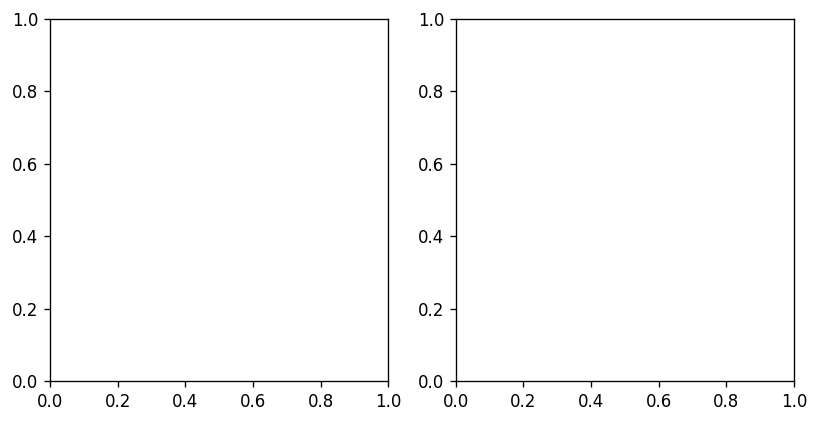

In [32]:
fig, ax = plt.subplots(1,2,figsize=(8,4), dpi=120)

# Loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(test_loss, label='Testing Loss')
ax[0].axis(ymin=-0.10, ymax=10)
ax[0].set_title('Loss Plot')
ax[0].legend()

# Accuracy
ax[1].plot(train_accuracy, label='Training Accuracy')
ax[1].plot(test_accuracy, label='Testing Accuracy')
ax[1].axis(ymin=0, ymax=101)
ax[1].set_title('Accuracy Plot')
ax[1].legend()
plt.show()

In [39]:
# from torchvision.models import vgg16

# device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
# print('Device:', device)

# num_classes = len(classes)

# model = vgg16(num_classes)
# model.to(device)

# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# criterion = nn.CrossEntropyLoss()
# exp_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# model = Predictor().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-8)
# optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [40]:
# from earlyStop import EarlyStopping

# train_avg_loss = 0
# total_step = len(trainloader)
# train_loss = []
# train_accuracy = []

# epochs = 10

# val_loss = 0
# validation_loss = []
# validation_accuracy = []
# valid_loss_min = np.Inf

# early_stop = EarlyStopping(patience=5, verbose=True)
# for epoch in range(epochs):
#     correct = 0
#     total = 0
#     tra_loss = 0.0
#     for i, data in enumerate(trainloader):
#         # get the inputs
#         inputs, labels = data
#         inputs, labels = inputs.to(device), labels.to(device)

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         tra_loss += loss.item()
#         _,pred = torch.max(outputs, dim=1)
#         correct += (pred == labels).sum().item()
#         total += labels.size(0)

#         if i % 1024 == 0:
#             print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss {:.6f}'.format(
#                 epoch, i * len(inputs), len(trainloader.dataset), 
#                 100. * i / len(trainloader), loss.item()))

#     #train_accuracy = 100 * correct / total
#     accuracy = 100 * correct / total
#     train_accuracy.append(accuracy)
#     train_loss.append(tra_loss/total_step)
#     print('Accuracy of the network on training: %d %%' % (accuracy))
#     print('Loss of the network on training:', np.mean(train_loss))

#     #train_writer.add_scalar('Loss/train', loss, epoch)
#     #train_writer.add_scalar('Accuracy/train', train_accuracy, epoch)

#     with torch.no_grad():
#         model.eval()
#         for i, data in enumerate(testloader):
#             total += 1
#             images, labels = data
#             images, labels = images.to(device), labels.to(device)

#             outputs = model(images)
#             _, predicted = torch.max(outputs.data, 1)
#             #total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()

#         #test_accuracy = 100 * correct / tota
#         validation_accuracy.append(100 * correct / total)
#         validation_loss.append(val_loss/len(testloader))
#         network_learned = val_loss < valid_loss_min
#         print('Accuracy of the network on validation: %d %%' % (100 * correct / total))
#         print('Loss of the network on validation:', (np.mean(validation_loss)))
#     network_learned = val_loss < valid_loss_min
#     if network_learned:
#         valid_loss_min = val_loss
#         torch.save(model.state_dict(), 'model_parameter.pkl')
#     # early_stopping needs the validation loss to check if it has decresed, 
#         # and if it has, it will make a checkpoint of the current model
#     early_stop(val_loss, model)
        
#     if early_stop.early_stop:
#         print("Early stopping")
#         break
# print('Finished Training')

In [41]:
# fig = plt.figure(figsize=(20,10))
# plt.title("Train-Validation Accuracy")
# plt.plot(train_accuracy, label='train')
# plt.plot(validation_accuracy, label='test')
# plt.xlabel('num_epochs', fontsize=12)
# plt.ylabel('accuracy', fontsize=12)
# plt.legend(loc='best')

In [42]:
# fig = plt.figure(figsize=(20,10))
# plt.title("Train-Validation Loss")
# plt.plot(train_loss, label='train')
# plt.plot(validation_loss, label='test')
# plt.xlabel('num_epochs', fontsize=12)
# plt.ylabel('loss', fontsize=12)
# plt.legend(loc='best')

Computer Vision Part

In [39]:
import cv2

Text(0.5, 1.0, 'Fruits')

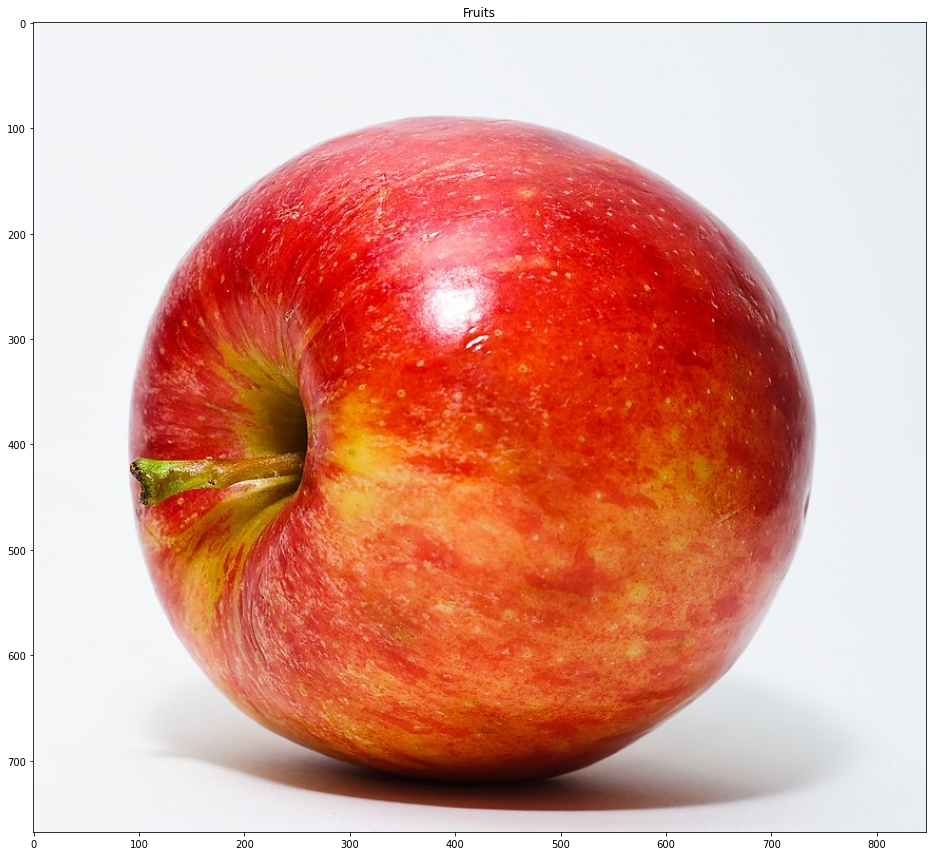

In [40]:
img = cv2.imread('../apple_test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.title('Fruits')

In [42]:
x = transform(img)  # Preprocess image

output = model(x)  # Forward pass
pred = torch.argmax(output, 1)  # Get predicted class if multi-class classification
print('Image predicted as ', pred)

C:\Users\hejac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


ValueError: expected 4D input (got 3D input)

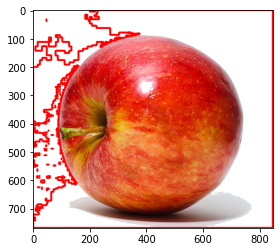

In [ ]:
lower_white = np.array([220, 220, 220], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)
mask = cv2.inRange(img, lower_white, upper_white)  # could also use threshold
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))  # "erase" the small white points in the resulting mask
mask = cv2.bitwise_not(mask)  # invert mask

# load background (could be an image too)
bk = np.full(img.shape, 255, dtype=np.uint8)  # white bk

# get masked foreground
fg_masked = cv2.bitwise_and(img, img, mask=mask)

# get masked background, mask must be inverted 
mask = cv2.bitwise_not(mask)
bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

# combine masked foreground and masked background 
final = cv2.bitwise_or(fg_masked, bk_masked)
mask = cv2.bitwise_not(mask)  # revert mask to original

plt.imshow(final)

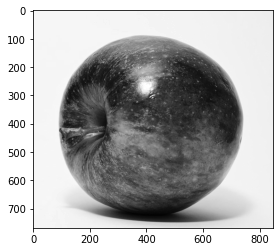

In [52]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

Text(0.5, 1.0, 'Binary version of apple image')

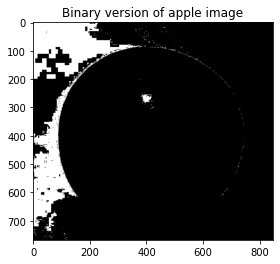

In [53]:
bin_gray_img = cv2.threshold(gray_img, 245, 255, cv2.THRESH_BINARY)

plt.imshow(bin_gray_img[1], cmap='gray')
plt.title('Binary version of apple image')

Text(0.5, 1.0, 'Inverted Binary version of apple image')

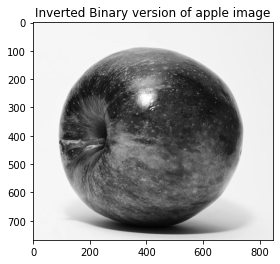

In [54]:
inv_bin_gray_img = ~bin_gray_img[1]

plt.imshow(gray_img, cmap='gray')
plt.title('Inverted Binary version of apple image')

Text(0.5, 1.0, 'Image with red boundary')

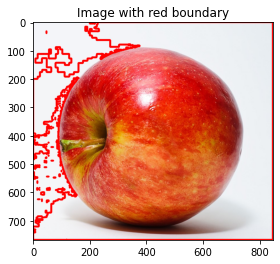

In [65]:
contours_list, heirachy = cv2.findContours(inv_bin_gray_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

with_contours = cv2.drawContours(img, contours_list, -1, (255, 0, 0), 5)

plt.imshow(img)
plt.title('Image with red boundary')

Referennce:
1. Fruits 360 on Kaggle: https://www.kaggle.com/datasets/moltean/fruits
2. PyTorch Training a classifier: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
3. Define a Neural Network in PyTorch: https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html